In [1]:
import cv2
import os
from keras.models import load_model
from keras.preprocessing.image import ImageDataGenerator
import itertools
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, roc_curve, auc, precision_recall_curve, f1_score
import matplotlib.pyplot as plt
import numpy as np
import random

In [2]:
test_dir = '../dataset/test'
Classes = ['closed', 'open']
img_size = 128
test_data = []

In [3]:
def create_training_data():
    for category in Classes:
        path = os.path.join(test_dir, category)
        class_num = Classes.index(category)
        for img in os.listdir(path):
            img_array = cv2.imread(os.path.join(path,img), cv2.IMREAD_GRAYSCALE)
            backtorgb = cv2.cvtColor(img_array,cv2.COLOR_GRAY2RGB)
            backtorgb  = cv2.resize(backtorgb, (img_size,img_size))
            test_data.append([backtorgb, class_num])

In [4]:
create_training_data()

In [6]:
random.shuffle(test_data)

In [7]:
X_test = []
y_test = []
for features, label in test_data:
    X_test.append(features)
    y_test.append(label)

X_test = np.array(X_test)
X_test = X_test/255.0

y_test = np.array(y_test)

In [8]:
def make_confusion_matrix(y_true, y_pred): 
    classes=['drowsy', 'non-drowsy']
    figsize=(5, 5)
    text_size=15
    # Create the confustion matrix
    cm = confusion_matrix(y_true, y_pred)
    cm_norm = cm.astype("float") / cm.sum(axis=1)[:, np.newaxis] # normalize it
    n_classes = cm.shape[0]

    # Plot the figure and make it pretty
    fig, ax = plt.subplots(figsize=figsize)
    cax = ax.matshow(cm, cmap=plt.cm.Blues)
    fig.colorbar(cax)

    if classes:
        labels = classes
    else:
        labels = np.arange(cm.shape[0])
  
    # Label the axes
    ax.set(title="Confusion Matrix",
         xlabel="Predicted label",
         ylabel="True label",
         xticks=np.arange(n_classes), # create enough axis slots for each class
         yticks=np.arange(n_classes), 
         xticklabels=labels,
         yticklabels=labels)
  
    # Make x-axis labels appear on bottom
    ax.xaxis.set_label_position("bottom")
    ax.xaxis.tick_bottom()

    # Set the threshold for different colors
    threshold = (cm.max() + cm.min()) / 2.

    # Plot the text on each cell
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, f"{cm[i, j]} ({cm_norm[i, j]*100:.1f}%)",
             horizontalalignment="center",
             color="white" if cm[i, j] > threshold else "black",
             size=text_size)

In [9]:
def predict_model(model):
    predictions = model.predict(X_test).round()
    return np.max(predictions, axis=1)

In [10]:
def get_evaluation_matrics(y_prediction):
    precision_test , recall_test , _ = precision_recall_curve(y_test, y_prediction)
        
    model_accuracy = round(accuracy_score(y_test, y_prediction), ndigits=5)
    print("Accuracy: {0:.3f}".format(model_accuracy * 100))
    
    recall_test = recall_score(y_test, y_prediction)
    print("recall: {0:.3f}".format(recall_test * 100))
    
    precision_test = precision_score(y_test, y_prediction)
    print("precision: {0:.3f}".format(precision_test * 100))
    
    f1_test = f1_score(y_test, y_prediction)
    print("F1 score: {0:.3f}".format(f1_test * 100))

In [11]:
def plot_roc_curve(predicted_classes):
    fpr, tpr, threshold = roc_curve(y_test, predicted_classes)
    roc_auc = auc(fpr, tpr)
        
    plt.title('Receiver Operating Characteristic')
    plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
    plt.legend(loc = 'lower right')
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([0, 1])
    plt.ylim([0, 1])
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.show()

# evaluate Basic model

In [23]:
model = load_model('../models/cnnBasic.h5')

In [24]:
predicted_classes = predict_model(model)

In [25]:
get_evaluation_matrics(predicted_classes)

Accuracy: 96.520
recall: 94.000
precision: 98.688
F1 score: 96.287


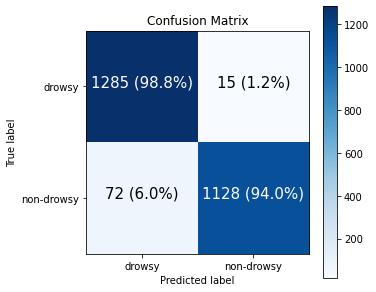

In [26]:
make_confusion_matrix(y_test, predicted_classes)

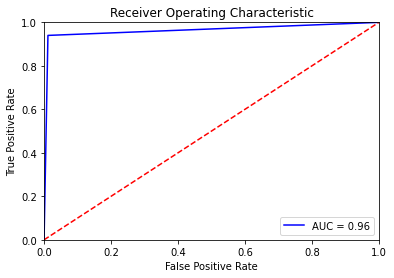

In [27]:
plot_roc_curve(predicted_classes)

# evaluate MobileNet

In [20]:
model = load_model('../models/mobileNet.h5')
predicted_classes = predict_model(model)
get_evaluation_matrics(predicted_classes)

Accuracy: 96.000
recall: 97.083
precision: 94.715
F1 score: 95.885


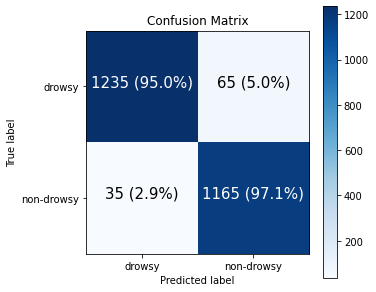

In [21]:
make_confusion_matrix(y_test, predicted_classes)

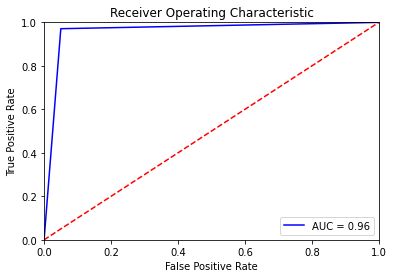

In [22]:
plot_roc_curve(predicted_classes)

# evaluate VGG

In [17]:
model = load_model('../models/VGG.h5')
predicted_classes = predict_model(model)
get_evaluation_matrics(predicted_classes)

Accuracy: 96.760
recall: 97.750
precision: 95.599
F1 score: 96.663


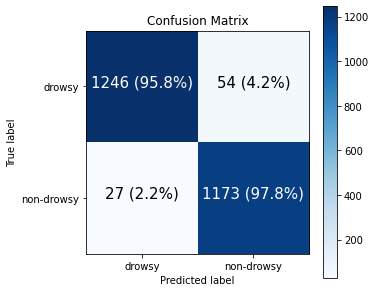

In [18]:
make_confusion_matrix(y_test, predicted_classes)

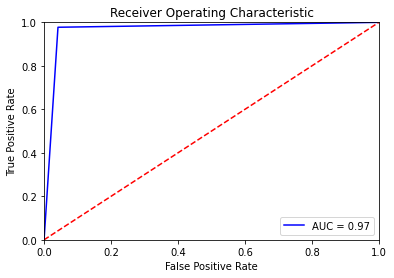

In [19]:
plot_roc_curve(predicted_classes)